In [2]:
import numpy as np
import scipy as sp

# Common

In [4]:
a = np.concatenate(([3], [0]*5, np.arange(-1, 1.002, 2/9.0)))
print(a)

p = np.poly1d([3,4,5])
print(p)
print(p(1))
print(p*p)
print(p.integ(k=6))
print(p.deriv())
a=p.deriv()
print(a(1))

[ 3.          0.          0.          0.          0.          0.         -1.
 -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111  0.33333333
  0.55555556  0.77777778  1.        ]
   2
3 x + 4 x + 5
12
   4      3      2
9 x + 24 x + 46 x + 40 x + 25
   3     2
1 x + 2 x + 5 x + 6
 
6 x + 4
10


# Integrate

In [7]:
import scipy.integrate as integrate
import scipy.special as special

def integrand(x, a, b):
    return a*x**2 + b

a = 2
b = 1
I = integrate.quad(integrand, 0, 1, args=(a,b))
print(I)

a = integrate.dblquad(lambda t, x: np.exp(-x*t)/t**2, 0, np.inf, lambda x: 1, lambda x: np.inf)
print(a)


a = integrate.nquad(lambda t,x: np.exp(-x*t) / t**5, [[1, np.inf],[0, np.inf]])
print(a)

(1.6666666666666667, 1.8503717077085944e-14)
(0.4999999999985751, 1.3894083651858995e-08)
(0.2000000000189363, 1.3682975855986131e-08)


# Optimisation

In [9]:
from scipy.optimize import root
from scipy.optimize import minimize_scalar

f = lambda x: (x - 1) **2
res = minimize_scalar(f, method='brent')
print(res.x)

res = minimize_scalar(f, bounds=(4, 7), method='bounded')
print(res.x)

y=lambda x: x ** 2 - 1
sol = root(y, [-2,2])
print(sol)


def func2(x):
    f = [x[0] * np.cos(x[1]) - 4,
x[1]*x[0] - x[1] - 5]
    return f

sol = root(func2, [1, 1], jac=False, method='lm')
print(sol.x)


1.0
4.00000343788
    fjac: array([[-0.94867955,  0.31623902],
       [-0.31623902, -0.94867955]])
     fun: array([ -7.53161977e-11,   7.53166418e-11])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([ -5.12754547e-11,  -5.78981143e-10])
       r: array([ 3.16235474,  1.89731954, -2.52976204])
  status: 1
 success: True
       x: array([-1.,  1.])
[ 6.50409711  0.90841421]


# Interpolate

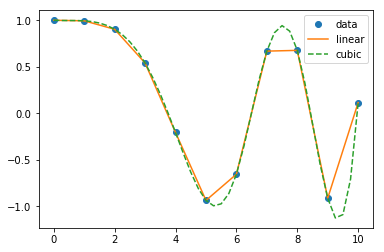

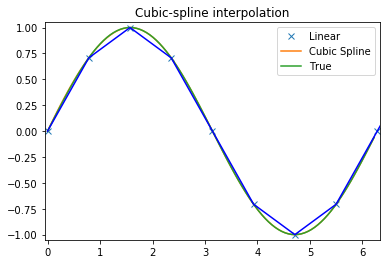

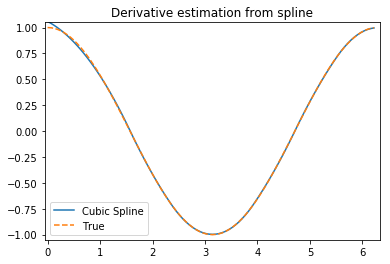

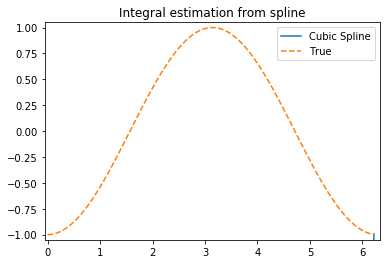

[  4.06280205e-18   3.14159265e+00   6.28318531e+00   9.42477796e+00]


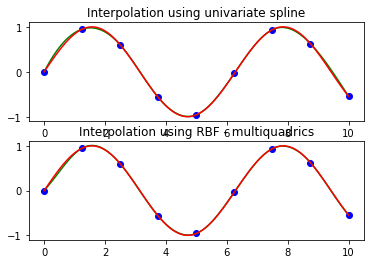

In [14]:
from scipy.interpolate import interp1d
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np

def f1():
    x = np.linspace(0, 10, num=11, endpoint=True)
    y = np.cos(-x**2/9.0)

    f = interp1d(x, y)
    f2 = interp1d(x, y, kind='cubic')
    xnew = np.linspace(0, 10, num=41, endpoint=True)

    plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
    plt.legend(['data', 'linear', 'cubic'], loc='best')
    plt.show()

def integ(x, tck, constant=-1):
    x = np.atleast_1d(x)
    out = np.zeros(x.shape, dtype=x.dtype)
    for n in range(len(out)):
        out[n] = interpolate.splint(0, x[n], tck)
        out += constant
    return out

def f2_spline():
    x = np.arange(0, 4*np.pi+np.pi/4, 2*np.pi/8)
    y = np.sin(x)
    tck = interpolate.splrep(x, y, s=0)
    xnew = np.arange(0, 2*np.pi, np.pi/50)
    ynew = interpolate.splev(xnew, tck, der=0)

    plt.figure()
    plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'b')
    plt.legend(['Linear', 'Cubic Spline', 'True'])
    plt.axis([-0.05, 6.33, -1.05, 1.05])
    plt.title('Cubic-spline interpolation')
    plt.show()

    #Derivative of spline
    yder = interpolate.splev(xnew, tck, der=1)
    plt.figure()
    plt.plot(xnew, yder, xnew, np.cos(xnew),'--')
    plt.legend(['Cubic Spline', 'True'])
    plt.axis([-0.05, 6.33, -1.05, 1.05])
    plt.title('Derivative estimation from spline')
    plt.show()

    #Integral of spline
    yint = integ(xnew, tck)
    plt.figure()
    plt.plot(xnew, yint, xnew, -np.cos(xnew), '--')
    plt.legend(['Cubic Spline', 'True'])
    plt.axis([-0.05, 6.33, -1.05, 1.05])
    plt.title('Integral estimation from spline')
    plt.show()

    #Roots of spline
    print(interpolate.sproot(tck) )

def f3_spline():
    x = np.linspace(0, 10, 9)
    y = np.sin(x)
    xi = np.linspace(0, 10, 101)

    ius = interpolate.InterpolatedUnivariateSpline(x, y)
    yi = ius(xi)

    plt.subplot(2, 1, 1)
    plt.plot(x, y, 'bo')
    plt.plot(xi, yi, 'g')
    plt.plot(xi, np.sin(xi), 'r')
    plt.title('Interpolation using univariate spline')

    rbf = interpolate.Rbf(x, y)
    fi = rbf(xi)
 
    plt.subplot(2, 1, 2)
    plt.plot(x, y, 'bo')
    plt.plot(xi, fi, 'g')
    plt.plot(xi, np.sin(xi), 'r')
    plt.title('Interpolation using RBF - multiquadrics')

    plt.show()

f1()
f2_spline()
f3_spline()

# Linalg

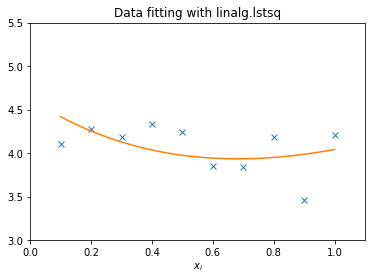

In [15]:
from scipy import linalg
import matplotlib.pyplot as plt
 

c1, c2 = 5.0, 2.0
i = np.r_[1:11]
xi = 0.1*i
yi = c1*np.exp(-xi) + c2*xi
zi = yi + 0.05 * np.max(yi) * np.random.randn(len(yi))
A = np.c_[np.exp(-xi)[:, np.newaxis], xi[:, np.newaxis]]
c, resid, rank, sigma = linalg.lstsq(A, zi)
xi2 = np.r_[0.1:1.0:100j]
yi2 = c[0]*np.exp(-xi2) + c[1]*xi2

plt.plot(xi,zi,'x',xi2,yi2)
plt.axis([0,1.1,3.0,5.5])
plt.xlabel('$x_i$')
plt.title('Data fitting with linalg.lstsq')

plt.show()
